In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
n, a, b = 51, 200, 100 # default parameters
q_default = stats.betabinom(n, a, b).pmf # probability mass function

In [3]:
w_min, w_max = 10, 60
w_default = np.linspace(w_min, w_max, n)
q_grid = q_default(w_default)

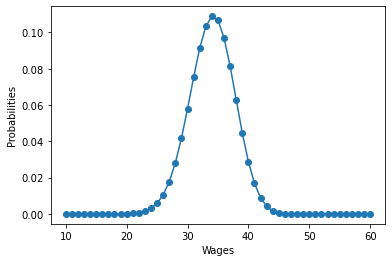

In [4]:
fig, ax = plt.subplots()

ax.plot(w_default, q_grid, '-o')
ax.set_xlabel('Wages')
ax.set_ylabel('Probabilities')

plt.show()

In [5]:
c = 25 # unemployment benefit
β = 0.99 # discount factor

# Fixed-point Iteration

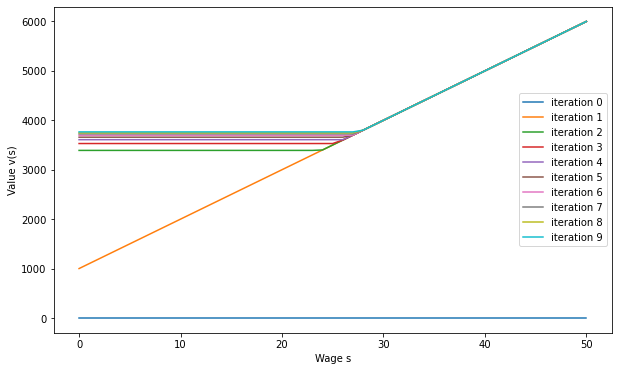

In [6]:
T = 10
v = np.zeros((T, n))
w = w_default / (1 - β)

for i in range(T - 1):
    
    cont = c + β * np.dot(v[i], q_grid) # continuation value
    
    is_accept = (w > cont) # accept given state?
    
    v[i + 1] = w * (is_accept==True) + cont * (is_accept==False)
    
    
plt.figure(figsize=(10, 6))

t_series = range(T)

for i in t_series:
    plt.plot(v[i], label = f'iteration {i}')

plt.xlabel('Wage s')
plt.ylabel('Value v(s)')

plt.legend(loc='best')
plt.show()

# Limit of finite period solution

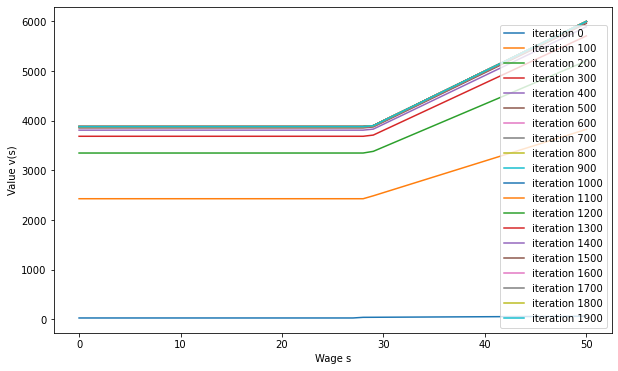

In [7]:
T = 2000
v = np.zeros((T, n))

# initialize value of accepting at iteration 0
v_accept = w_default
is_accept = (w_default > c)

# first iteration
v[0] = w_default * (is_accept) + c * (is_accept==False)

for i in range(T-1):
    
    # update value of accepting
    v_accept = w_default + β*v_accept
    
    cont = c + β * np.dot(v[i], q_grid)
    
    is_accept = (v_accept > cont)
    
    v[i+1] = v_accept*(is_accept==True) + cont*(is_accept==False)
    

# plot    
plt.figure(figsize = (10, 6))
t_series = range(0, T, 100)

for i in t_series:
    plt.plot(v[i, :], label = f"iteration {i}")

plt.legend(loc = 'best')
plt.xlabel('Wage s')
plt.ylabel('Value v(s)')

plt.show()

## Solve a variation of McCall Model

Assume everything is the same, but the employed agent will be fired with probability $\alpha$.

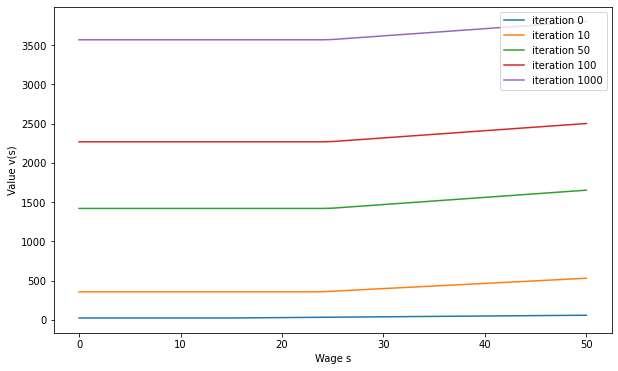

In [8]:
α = 0.1 # probability of being fired

T = 2000
v_u = np.zeros((T, n))
v_e = np.zeros((T, n))

# first iteration
v_e[0] = w_default
is_accept = (v_e[0] > c)

v_u[0] = v_e[0] * (is_accept) + c * (is_accept==False)

for i in range(T-1):
    
    # compute v_e
    v_e[i+1] = w_default + \
    β * (α * np.dot(v_u[i], q_grid) + (1-α)*v_e[i])
    
    # compute v_u
    cont = c + β * np.dot(v_u[i], q_grid)
    is_accept = (v_e[i + 1] > cont)
    v_u[i+1] = v_e[i+1] * (is_accept==True) + cont*(is_accept==False)
    
    
# plot
plt.figure(figsize = (10, 6))
t_series = [0, 10, 50, 100, 1000]

for i in t_series:
    plt.plot(v_u[i, :], label = f"iteration {i}")

plt.legend(loc = 'best')
plt.xlabel('Wage s')
plt.ylabel('Value v(s)')

plt.show()

# Variations of McCall

## 1. Correlated Wage Offers

We start with the original McCall Model. Instead of assuming i.i.d. wage offers (and put a probability distribution on them), we assume that the wage offers are correlated. Suppose the transition probabilities of the states follow a Markov chain like this: for n = 5

$$
P = \left[\begin{array}{ccccc}
\rho & 1-\rho\\
\frac{1-\rho}{2} & \rho & \frac{1-\rho}{2}\\
& \frac{1-\rho}{2} & \rho & \frac{1-\rho}{2}\\
& & \frac{1-\rho}{2} & \rho & \frac{1-\rho}{2}\\
 &  &  & 1-\rho & \rho
\end{array}\right]
$$

How to formulate the value function?

In [15]:
n = 51 # possible states
w_min, w_max = 10, 60
w_default = np.linspace(w_min, w_max, n)

In [16]:
c = 25       # Unemployment benefit
beta = 0.99  # Discount factor
rho = 0.8    # Persistence of wage offer

In [17]:
# Construct Markov chain
P = np.zeros((n, n))
for i in range(n):
    P[i, i] = rho
    if (i == 0):
        P[i, i + 1] = 1 - rho
    elif (i == (n - 1)):
        P[i, i - 1] = 1 - rho
    else:
        P[i, i - 1] = (1 - rho) / 2
        P[i, i + 1] = (1 - rho) / 2

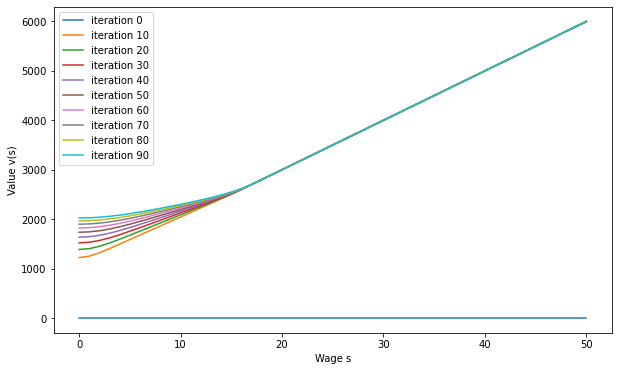

In [32]:
T = 100
v = np.zeros((T, n))
w = w_default / (1 - beta)

for i in range(T-1):
    
    cont = c + beta * np.dot(P, v[i].T)
    
    is_accept = (w > cont)
    
    v[i + 1] = w * is_accept + cont * (is_accept == False)

# plot
plt.figure(figsize = (10, 6))
t_series = range(0, T, int(T/10))

for i in t_series:
    plt.plot(v[i, :], label = f"iteration {i}")

plt.legend(loc = 'best')
plt.xlabel('Wage s')
plt.ylabel('Value v(s)')

plt.show()

In [ ]:
T = 2000
v = np.zeros((T, n))
w = w_default / (1 - beta)

is_accept = (w_default > c)

for i in range(T-1):
    
    cont = c + beta * np.dot(P, v[i].T)
    
    is_accept = (w > cont)
    
    v[i + 1] = w * is_accept + cont * (is_accept == False)

# plot
plt.figure(figsize = (10, 6))
t_series = range(0, T, int(T/10))

for i in t_series:
    plt.plot(v[i, :], label = f"iteration {i}")

plt.legend(loc = 'best')
plt.xlabel('Wage s')
plt.ylabel('Value v(s)')

plt.show()